<a href="https://colab.research.google.com/github/Mukish45/Computer-Vision/blob/main/Face_And_Facial_Landmarks_Detection_MediaPipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 1.3 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.12.6 which is incompatible.


In [3]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [4]:
mp_face_detection = mp.solutions.face_detection

face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

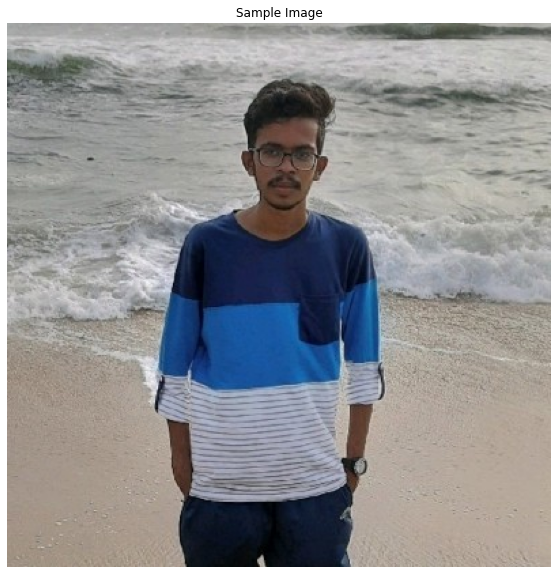

In [22]:
sample_img = cv2.imread('/content/mukish-profile.jpeg')

plt.figure(figsize = [10, 10])

plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [23]:
face_detection_results = face_detection.process(sample_img[:,:,::-1])

In [24]:
for face_no, face in enumerate(face_detection_results.detections):

    print(f'FACE NUMBER: {face_no+1}')
    print('==============================')

    print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')

    face_data = face.location_data

    print(f'nFACE BOUNDING BOX:n{face_data.relative_bounding_box}')

    for i in range(2):

        print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
        print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}')

FACE NUMBER: 1
FACE CONFIDENCE: 0.96
nFACE BOUNDING BOX:nxmin: 0.4371723234653473
ymin: 0.20064789056777954
width: 0.15072104334831238
height: 0.15072116255760193

RIGHT_EYE:
x: 0.4877108633518219
y: 0.24044133722782135

LEFT_EYE:
x: 0.5490335822105408
y: 0.24573372304439545



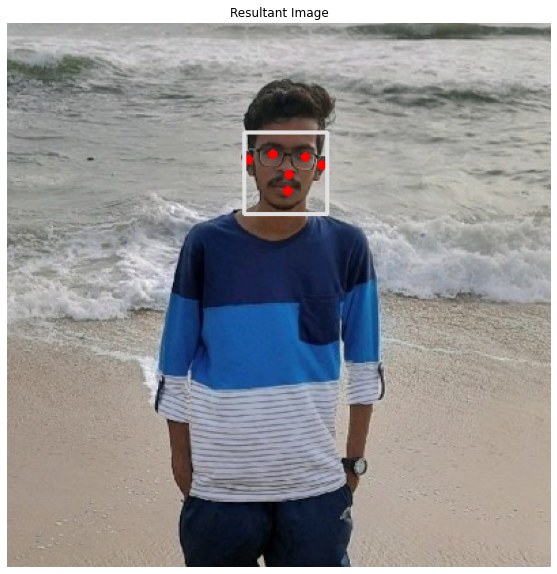

In [25]:
img_copy = sample_img[:,:,::-1].copy()

if face_detection_results.detections:

    for face_no, face in enumerate(face_detection_results.detections):

        mp_drawing.draw_detection(image=img_copy, detection=face, 
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=2,
                                                                              circle_radius=2))
fig = plt.figure(figsize = [10, 10])

plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

In [26]:
import itertools
from time import time

In [27]:
mp_face_mesh = mp.solutions.face_mesh

face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

mp_drawing_styles = mp.solutions.drawing_styles

In [28]:
face_mesh_results = face_mesh_images.process(sample_img[:,:,::-1])

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

if face_mesh_results.multi_face_landmarks:

    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):

        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')

        print(f'LEFT EYE LANDMARKS:n')

        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[LEFT_EYE_INDEX])

        print(f'RIGHT EYE LANDMARKS:n')

        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[RIGHT_EYE_INDEX])

FACE NUMBER: 1
-----------------------
LEFT EYE LANDMARKS:n
x: 0.5345228314399719
y: 0.2388204038143158
z: 0.0021028416231274605

x: 0.539014458656311
y: 0.23783652484416962
z: 0.0011570554925128818

RIGHT EYE LANDMARKS:n
x: 0.4815458059310913
y: 0.23469020426273346
z: 0.0009011987131088972

x: 0.475232869386673
y: 0.23761484026908875
z: 0.006650239694863558



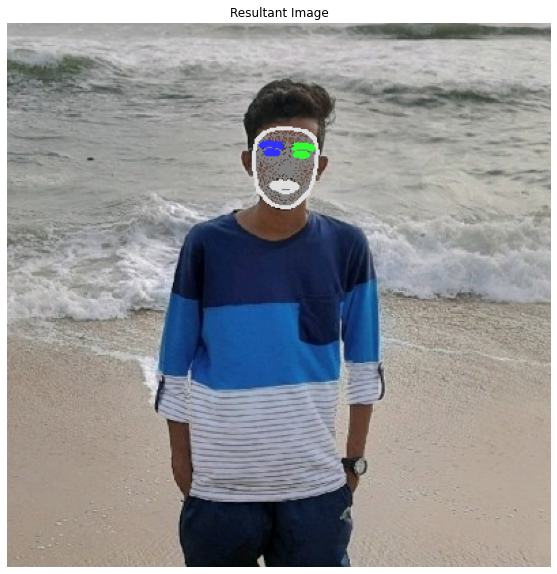

In [29]:
img_copy = sample_img[:,:,::-1].copy()

if face_mesh_results.multi_face_landmarks:

    for face_landmarks in face_mesh_results.multi_face_landmarks:

        mp_drawing.draw_landmarks(image=img_copy, 
                                  landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
        
        mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

fig = plt.figure(figsize = [10, 10])
plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()